<div class="alert alert-info">
<b> Introduction</b><br>
Customer churn is one of the most critical challenges for modern financial institutions. At Beta Bank, clients have been gradually leaving month after month, causing a steady erosion of the customer base. Since acquiring new customers is often more expensive than retaining existing ones, the bank has prioritized predicting and preventing churn.
<br><br>
The goal of this project is to build a machine learning model capable of predicting whether a customer is likely to leave the bank in the near future, based on historical behavioral and contractual data. The model’s effectiveness will be primarily evaluated using the F1 score, with a minimum threshold of 0.59 required for success. To gain a deeper understanding of performance, the AUC-ROC metric will also be measured and compared against the F1 score.
<br><br>
By accurately identifying customers at risk of churn, the bank will be able to implement timely retention strategies, ultimately reducing losses and strengthening customer loyalty.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

print(data.shape)
data.info()
data.head()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
missing_data = data[data['Tenure'].isnull()]
missing_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [4]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
clean_data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
clean_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [6]:
data_ohe = pd.get_dummies(clean_data, drop_first = True)

data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


In [7]:
train_valid, test = train_test_split(data_ohe, test_size = 0.20, random_state = 12345)
train, valid = train_test_split(train_valid, test_size = 0.25, random_state = 12345)

In [8]:
features_train = train.drop(['Exited'], axis = 1)
target_train = train['Exited']

features_valid = valid.drop(['Exited'], axis = 1)
target_valid = valid['Exited']

features_test = test.drop(['Exited'], axis = 1)
target_test = test['Exited']

In [9]:
scaler = StandardScaler()

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler.fit(features_train[numerical_features])

StandardScaler()

In [10]:
features_train_scaled = features_train.copy()
features_train_scaled[numerical_features] = scaler.transform(features_train[numerical_features])

features_valid_scaled = features_valid.copy()
features_valid_scaled[numerical_features] = scaler.transform(features_valid[numerical_features])

features_test_scaled = features_test.copy()
features_test_scaled[numerical_features] = scaler.transform(features_test[numerical_features])

In [11]:
baseline_model = LogisticRegression(random_state = 12345, solver = 'liblinear')
baseline_model.fit(features_train_scaled,target_train)
baseline_predicted_valid = baseline_model.predict(features_valid_scaled)
baseline_accuracy = accuracy_score(target_valid, baseline_predicted_valid)
baseline_precision = precision_score(target_valid, baseline_predicted_valid)
baseline_recall = recall_score(target_valid, baseline_predicted_valid)
baseline_f1 = f1_score(target_valid, baseline_predicted_valid)
print('Unbalanced Model Accuracy:', baseline_accuracy)
print('Precision:', baseline_precision)
print('Recall:', baseline_recall)
print('F1-Score:', baseline_f1)

Unbalanced Model Accuracy: 0.8145
Precision: 0.5714285714285714
Recall: 0.20460358056265984
F1-Score: 0.30131826741996237


In [12]:
print(target_train.value_counts())
print(target_train.value_counts(normalize=True))

0    4781
1    1219
Name: Exited, dtype: int64
0    0.796833
1    0.203167
Name: Exited, dtype: float64


In [13]:
balanced_model = LogisticRegression(class_weight = 'balanced', random_state = 12345, solver = 'liblinear')
balanced_model.fit(features_train_scaled,target_train)
balanced_predicted_valid = balanced_model.predict(features_valid_scaled)
balanced_accuracy = accuracy_score(target_valid, balanced_predicted_valid)
balanced_precision = precision_score(target_valid, balanced_predicted_valid)
balanced_recall = recall_score(target_valid, balanced_predicted_valid)
balanced_f1 = f1_score(target_valid, balanced_predicted_valid)
print('Balanced Model Accuracy:', balanced_accuracy)
print('Precision:', balanced_precision)
print('Recall:', balanced_recall)
print('F1-Score:', balanced_f1)

Balanced Model Accuracy: 0.705
Precision: 0.36388508891928867
Recall: 0.680306905370844
F1-Score: 0.4741532976827095


In [14]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    arg_1 = pd.concat([features_zeros] + [features_ones] * repeat)
    arg_2 = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(arg_1, arg_2, random_state = 12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled= upsample(features_train, target_train, 4)

In [15]:
features_upsampled_scaled = features_upsampled.copy()
features_upsampled_scaled[numerical_features] = scaler.transform(features_upsampled[numerical_features])

In [16]:
upsampled_model = LogisticRegression(random_state = 12345, solver = 'liblinear')
upsampled_model.fit(features_upsampled_scaled, target_upsampled)
upsampled_predicted_valid = upsampled_model.predict(features_valid_scaled)
upsampled_accuracy = accuracy_score(target_valid, upsampled_predicted_valid)
upsampled_precision = precision_score(target_valid, upsampled_predicted_valid)
upsampled_recall = recall_score(target_valid, upsampled_predicted_valid)
upsampled_f1 = f1_score(target_valid, upsampled_predicted_valid)
print('Upsampled Model Accuracy:', upsampled_accuracy)
print('Precision:', upsampled_precision)
print('Recall:', upsampled_recall)
print('F1-Score:', upsampled_f1)

Upsampled Model Accuracy: 0.703
Precision: 0.363758389261745
Recall: 0.6930946291560103
F1-Score: 0.4771126760563381


In [17]:
def downsample (features, target, frac):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac = frac, random_state = 12345), features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac = frac, random_state = 12345), target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state = 12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample (features_train, target_train, 0.1)

In [18]:
features_downsampled_scaled = features_downsampled.copy()
features_downsampled_scaled[numerical_features] = scaler.transform(features_downsampled[numerical_features])

In [19]:
downsampled_model = LogisticRegression(random_state = 12345, solver = 'liblinear')
downsampled_model.fit(features_downsampled_scaled, target_downsampled)
downsampled_predicted_valid = downsampled_model.predict(features_valid_scaled)
downsampled_accuracy = accuracy_score(target_valid, downsampled_predicted_valid)
downsampled_precision = precision_score(target_valid, downsampled_predicted_valid)
downsampled_recall = recall_score(target_valid, downsampled_predicted_valid)
downsampled_f1 = f1_score(target_valid, downsampled_predicted_valid)
print('Downsampled Model Accuracy:', downsampled_accuracy)
print('Precision:', downsampled_precision)
print('Recall:', downsampled_recall)
print('F1-Score:', downsampled_f1)

Downsampled Model Accuracy: 0.4675
Precision: 0.25997150997151
Recall: 0.9335038363171355
F1-Score: 0.4066852367688022


In [20]:
best_score = 0
best_est= 0
for est in range (10,100, 10):
    rf_model = RandomForestClassifier(n_estimators = est, random_state = 12345)
    rf_model.fit(features_train, target_train)
    predicted_valid = rf_model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_est = est

print('Random Forest:', '(Best Est):', best_est, '(F1):', best_score)

Random Forest: (Best Est): 40 (F1): 0.5596184419713831


In [21]:
best_score = 0
best_est = 40
best_depth = 0
for depth in [5 , 7, 10, 15, 20, None]:
    rf_model = RandomForestClassifier(random_state = 12345, n_estimators = 40, max_depth = depth)
    rf_model.fit(features_train, target_train)
    predicted_valid = rf_model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_depth = depth

print('Random Forest:', '(Best Depth):', best_depth, '(F1):', best_score)

Random Forest: (Best Depth): 15 (F1): 0.5750394944707741


<div class="alert alert-info">

Best Hyperparameters for Random Forest model

In [22]:
rf_model = RandomForestClassifier(n_estimators = 40, max_depth = 15, random_state = 12345)
rf_model.fit(features_train, target_train)
rf_predicted_valid = rf_model.predict(features_valid)
rf_accuracy = accuracy_score(target_valid, rf_predicted_valid)
rf_precision = precision_score(target_valid, rf_predicted_valid)
rf_recall = recall_score(target_valid, rf_predicted_valid)
rf_f1 = f1_score(target_valid, rf_predicted_valid)
print('Unbalanced Random Forest Model Accuracy:', rf_accuracy)
print('Precision:', rf_precision)
print('Recall:', rf_recall)
print('F1-Score:', rf_f1)

Unbalanced Random Forest Model Accuracy: 0.8655
Precision: 0.7520661157024794
Recall: 0.46547314578005117
F1-Score: 0.5750394944707741


In [23]:
rf_balanced_model = RandomForestClassifier(n_estimators = 40, max_depth = 15, class_weight = 'balanced', random_state = 12345)
rf_balanced_model.fit(features_train, target_train)
rf_balanced_predicted_valid = rf_balanced_model.predict(features_valid)
rf_balanced_accuracy = accuracy_score(target_valid, rf_balanced_predicted_valid)
rf_balanced_precision = precision_score(target_valid, rf_balanced_predicted_valid)
rf_balanced_recall = recall_score(target_valid, rf_balanced_predicted_valid)
rf_balanced_f1 = f1_score(target_valid, rf_balanced_predicted_valid)
print('Balanced Random Forest Model Accuracy:', rf_balanced_accuracy)
print('Precision:', rf_balanced_precision)
print('Recall:', rf_balanced_recall)
print('F1-Score:', rf_balanced_f1)

Balanced Random Forest Model Accuracy: 0.857
Precision: 0.6981132075471698
Recall: 0.4731457800511509
F1-Score: 0.5640243902439024


In [24]:
best_score = 0
best_est= 0
for est in range (10,100, 10):
    rf_upsamp_model = RandomForestClassifier(n_estimators = est, random_state = 12345)
    rf_upsamp_model.fit(features_upsampled, target_upsampled)
    predicted_valid = rf_upsamp_model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_est = est

print('Upsampled Random Forest:', '(Best Est):', best_est, '(F1):', best_score)

Upsampled Random Forest: (Best Est): 90 (F1): 0.5879043600562588


In [25]:
best_score = 0
best_est = 90
best_depth = 0
for depth in [5 , 7, 10, 15, 20, None]:
    rf_upsamp_model = RandomForestClassifier(random_state = 12345, n_estimators = 90, max_depth = depth)
    rf_upsamp_model.fit(features_upsampled, target_upsampled)
    predicted_valid = rf_upsamp_model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_depth = depth

print('Upsampled Random Forest:', '(Best Depth):', best_depth, '(F1):', best_score)

Upsampled Random Forest: (Best Depth): 15 (F1): 0.5941644562334216


<div class="alert alert-info">
Upsampled best Random Forest parameter:

In [26]:
rf_upsampled_model = RandomForestClassifier(n_estimators = 90, max_depth = 15, random_state = 12345)
rf_upsampled_model.fit(features_upsampled, target_upsampled)
rf_upsampled_predicted_valid = rf_upsampled_model.predict(features_valid)
rf_upsampled_accuracy = accuracy_score(target_valid, rf_upsampled_predicted_valid)
rf_upsampled_precision = precision_score(target_valid, rf_upsampled_predicted_valid)
rf_upsampled_recall = recall_score(target_valid, rf_upsampled_predicted_valid)
rf_upsampled_f1 = f1_score(target_valid, rf_upsampled_predicted_valid)
print('Upsampled Random Forest Model Accuracy:', rf_upsampled_accuracy)
print('Precision:', rf_upsampled_precision)
print('Recall:', rf_upsampled_recall)
print('F1-Score:', rf_upsampled_f1)

Upsampled Random Forest Model Accuracy: 0.847
Precision: 0.6170798898071626
Recall: 0.5728900255754475
F1-Score: 0.5941644562334216


In [27]:
best_score = 0
best_est= 0
for est in range (10,100, 10):
    rf_downsamp_model = RandomForestClassifier(n_estimators = est, random_state = 12345)
    rf_downsamp_model.fit(features_downsampled, target_downsampled)
    predicted_valid = rf_downsamp_model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_est = est

print('Downsampled Random Forest:', '(Best Est):', best_est, '(F1):', best_score)

Downsampled Random Forest: (Best Est): 50 (F1): 0.4834571235651587


In [28]:
best_score = 0
best_est = 50
best_depth = 0
for depth in [5 , 7, 10, 15, 20, None]:
    rf_downsamp_model = RandomForestClassifier(random_state = 12345, n_estimators = 50, max_depth = depth)
    rf_downsamp_model.fit(features_downsampled, target_downsampled)
    predicted_valid = rf_downsamp_model.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_depth = depth

print('Downsampled Random Forest:', '(Best Depth):', best_depth, '(F1):', best_score)

Downsampled Random Forest: (Best Depth): 20 (F1): 0.4834571235651587


In [29]:
rf_downsampled_model = RandomForestClassifier(n_estimators = 50, max_depth = 20, random_state = 12345)
rf_downsampled_model.fit(features_downsampled, target_downsampled)
rf_downsampled_predicted_valid = rf_downsampled_model.predict(features_valid)
rf_downsampled_accuracy = accuracy_score(target_valid, rf_downsampled_predicted_valid)
rf_downsampled_precision = precision_score(target_valid, rf_downsampled_predicted_valid)
rf_downsampled_recall = recall_score(target_valid, rf_downsampled_predicted_valid)
rf_downsampled_f1 = f1_score(target_valid, rf_downsampled_predicted_valid)
print('Downsampled Random Forest Model Accuracy:', rf_downsampled_accuracy)
print('Precision:', rf_downsampled_precision)
print('Recall:', rf_downsampled_recall)
print('F1-Score:', rf_downsampled_f1)

Downsampled Random Forest Model Accuracy: 0.6175
Precision: 0.3284403669724771
Recall: 0.9156010230179028
F1-Score: 0.4834571235651587


In [30]:
best_model = None
best_result = 0
for depth in range (1, 20):
    dt_model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    dt_model.fit(features_train, target_train)
    predicted_valid = dt_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = dt_model
        best_result = result

print('Best Decision Tree:', '(Max Depth):', best_model.max_depth, '(F1):', best_result)

Best Decision Tree: (Max Depth): 7 (F1): 0.5583596214511041


In [31]:
best_model = None
best_result = 0
for split in [40 , 45, 50, 55, 60]:
    dt_model = DecisionTreeClassifier(random_state = 12345, max_depth = 7, min_samples_split = split)
    dt_model.fit(features_train, target_train)
    predicted_valid = dt_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)

    print('(Sample Split):', split, '(F1):', result)   
    
    if result > best_result:
        best_model = dt_model
        best_result = result

print('Best Decision Tree:', '(Max Depth):', best_model.max_depth, '(Sample Split):', best_model.min_samples_split, '(F1):', best_result)

(Sample Split): 40 (F1): 0.5389610389610391
(Sample Split): 45 (F1): 0.5395799676898223
(Sample Split): 50 (F1): 0.5368248772504092
(Sample Split): 55 (F1): 0.5368248772504092
(Sample Split): 60 (F1): 0.5368248772504092
Best Decision Tree: (Max Depth): 7 (Sample Split): 45 (F1): 0.5395799676898223


In [32]:
best_model = None
best_result = 0
best_leaf = 0
for leaf in range (1, 11):
    dt_model = DecisionTreeClassifier(random_state = 12345, max_depth = 7, min_samples_split = 45, min_samples_leaf = leaf)
    dt_model.fit(features_train, target_train)
    predicted_valid = dt_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)

    print('(Sample Leaf):', leaf, '(F1):', result)   
    
    if result > best_result:
        best_model = dt_model
        best_result = result

print('Best Decision Tree:', '(Max Depth):', best_model.max_depth, '(Sample Split):', best_model.min_samples_split, '(Sample Leaf):', best_model.min_samples_leaf, '(F1):', best_result)

(Sample Leaf): 1 (F1): 0.5395799676898223
(Sample Leaf): 2 (F1): 0.5419354838709678
(Sample Leaf): 3 (F1): 0.5419354838709678
(Sample Leaf): 4 (F1): 0.5428109854604201
(Sample Leaf): 5 (F1): 0.5428109854604201
(Sample Leaf): 6 (F1): 0.5436893203883495
(Sample Leaf): 7 (F1): 0.5472
(Sample Leaf): 8 (F1): 0.5472
(Sample Leaf): 9 (F1): 0.5472
(Sample Leaf): 10 (F1): 0.5472
Best Decision Tree: (Max Depth): 7 (Sample Split): 45 (Sample Leaf): 7 (F1): 0.5472


In [33]:
dt_model = DecisionTreeClassifier(random_state = 12345, max_depth = 7, min_samples_split = 46, min_samples_leaf = 7)
dt_model.fit(features_train, target_train)
dt_predicted_valid = dt_model.predict(features_valid)
dt_accuracy = accuracy_score(target_valid, dt_predicted_valid)
dt_precision = precision_score(target_valid, dt_predicted_valid)
dt_recall = recall_score(target_valid, dt_predicted_valid)
dt_f1 = f1_score(target_valid, dt_predicted_valid)
print('Unbalanced Decision Tree Model Accuracy:', dt_accuracy)
print('Precision:', dt_precision)
print('Recall:', dt_recall)
print('F1-Score:', dt_f1)

Unbalanced Decision Tree Model Accuracy: 0.8585
Precision: 0.7307692307692307
Recall: 0.4373401534526854
F1-Score: 0.5472


In [34]:
dt_balanced_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 12345, max_depth = 7, min_samples_split = 45, min_samples_leaf = 7)
dt_balanced_model.fit(features_train, target_train)
dt_balanced_predicted_valid = dt_balanced_model.predict(features_valid)
dt_balanced_accuracy = accuracy_score(target_valid, dt_balanced_predicted_valid)
dt_balanced_precision = precision_score(target_valid, dt_balanced_predicted_valid)
dt_balanced_recall = recall_score(target_valid, dt_balanced_predicted_valid)
dt_balanced_f1 = f1_score(target_valid, dt_balanced_predicted_valid)
print('Balanced Decision Tree Model Accuracy:', dt_balanced_accuracy)
print('Precision:', dt_balanced_precision)
print('Recall:', dt_balanced_recall)
print('F1-Score:', dt_balanced_f1)

Balanced Decision Tree Model Accuracy: 0.7775
Precision: 0.4560260586319218
Recall: 0.7161125319693095
F1-Score: 0.5572139303482586


In [35]:
best_model = None
best_result = 0
for depth in range (1, 8):
    dt_upsamp_model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    dt_upsamp_model.fit(features_upsampled, target_upsampled)
    predicted_valid = dt_upsamp_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = dt_upsamp_model
        best_result = result

print('Best Upsampled Decision Tree:', '(Max Depth):', best_model.max_depth, '(F1):', best_result)

Best Upsampled Decision Tree: (Max Depth): 6 (F1): 0.5587044534412956


In [36]:
best_model = None
best_result = 0
for split in [40 , 45, 50, 55, 60]:
    dt_upsamp_model = DecisionTreeClassifier(random_state = 12345, max_depth = 6, min_samples_split = split)
    dt_upsamp_model.fit(features_upsampled, target_upsampled)
    predicted_valid = dt_upsamp_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)

    print('(Sample Split):', split, '(F1):', result)   
    
    if result > best_result:
        best_model = dt_upsamp_model
        best_result = result

print('Best Upsampled Decision Tree:', '(Max Depth):', best_model.max_depth, '(Sample Split):', best_model.min_samples_split, '(F1):', best_result)

(Sample Split): 40 (F1): 0.5604060913705584
(Sample Split): 45 (F1): 0.5604060913705584
(Sample Split): 50 (F1): 0.5604060913705584
(Sample Split): 55 (F1): 0.5604060913705584
(Sample Split): 60 (F1): 0.5604060913705584
Best Upsampled Decision Tree: (Max Depth): 6 (Sample Split): 40 (F1): 0.5604060913705584


In [37]:
best_model = None
best_result = 0
best_leaf = 0
for leaf in range (1, 11):
    dt_upsamp_model = DecisionTreeClassifier(random_state = 12345, max_depth = 6, min_samples_split = 40, min_samples_leaf = leaf)
    dt_upsamp_model.fit(features_upsampled, target_upsampled)
    predicted_valid = dt_upsamp_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)

    print('(Sample Leaf):', leaf, '(F1):', result)   
    
    if result > best_result:
        best_model = dt_upsamp_model
        best_result = result

print('Best Upsampled Decision Tree:', '(Max Depth):', best_model.max_depth, '(Sample Split):', best_model.min_samples_split, '(Sample Leaf):', best_model.min_samples_leaf, '(F1):', best_result)

(Sample Leaf): 1 (F1): 0.5604060913705584
(Sample Leaf): 2 (F1): 0.5618661257606491
(Sample Leaf): 3 (F1): 0.5621840242669364
(Sample Leaf): 4 (F1): 0.5621840242669364
(Sample Leaf): 5 (F1): 0.5621840242669364
(Sample Leaf): 6 (F1): 0.5621840242669364
(Sample Leaf): 7 (F1): 0.5621840242669364
(Sample Leaf): 8 (F1): 0.5621840242669364
(Sample Leaf): 9 (F1): 0.5621840242669364
(Sample Leaf): 10 (F1): 0.5621840242669364
Best Upsampled Decision Tree: (Max Depth): 6 (Sample Split): 40 (Sample Leaf): 3 (F1): 0.5621840242669364


In [38]:
dt_upsampled_model = DecisionTreeClassifier(random_state = 12345, max_depth = 6, min_samples_split = 40, min_samples_leaf = 3)
dt_upsampled_model.fit(features_upsampled, target_upsampled)
dt_upsampled_predicted_valid = dt_upsampled_model.predict(features_valid)
dt_upsampled_accuracy = accuracy_score(target_valid, dt_upsampled_predicted_valid)
dt_upsampled_precision = precision_score(target_valid, dt_upsampled_predicted_valid)
dt_upsampled_recall = recall_score(target_valid, dt_upsampled_predicted_valid)
dt_upsampled_f1 = f1_score(target_valid, dt_upsampled_predicted_valid)
print('Upsampled Decision Tree Model Accuracy:', dt_upsampled_accuracy)
print('Precision:', dt_upsampled_precision)
print('Recall:', dt_upsampled_recall)
print('F1-Score:', dt_upsampled_f1)

Upsampled Decision Tree Model Accuracy: 0.7835
Precision: 0.46488294314381273
Recall: 0.710997442455243
F1-Score: 0.5621840242669364


In [39]:
best_model = None
best_result = 0
for depth in range (1, 8):
    dt_downsamp_model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    dt_downsamp_model.fit(features_downsampled, target_downsampled)
    predicted_valid = dt_downsamp_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = dt_downsamp_model
        best_result = result

print('Best Downsampled Decision Tree:', '(Max Depth):', best_model.max_depth, '(F1):', best_result)

Best Downsampled Decision Tree: (Max Depth): 5 (F1): 0.5164394546912591


In [40]:
best_model = None
best_result = 0
for split in [40 , 45, 50, 55, 60]:
    dt_downsamp_model = DecisionTreeClassifier(random_state = 12345, max_depth = 5, min_samples_split = split)
    dt_downsamp_model.fit(features_downsampled, target_downsampled)
    predicted_valid = dt_downsamp_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)

    print('(Sample Split):', split, '(F1):', result)   
    
    if result > best_result:
        best_model = dt_downsamp_model
        best_result = result

print('Best Downsampled Decision Tree:', '(Max Depth):', best_model.max_depth, '(Sample Split):', best_model.min_samples_split, '(F1):', best_result)

(Sample Split): 40 (F1): 0.514423076923077
(Sample Split): 45 (F1): 0.5139664804469274
(Sample Split): 50 (F1): 0.5139664804469274
(Sample Split): 55 (F1): 0.5139664804469274
(Sample Split): 60 (F1): 0.5139664804469274
Best Downsampled Decision Tree: (Max Depth): 5 (Sample Split): 40 (F1): 0.514423076923077


In [41]:
best_model = None
best_result = 0
best_leaf = 0
for leaf in range (1, 11):
    dt_downsamp_model = DecisionTreeClassifier(random_state = 12345, max_depth = 6, min_samples_split = 40, min_samples_leaf = leaf)
    dt_downsamp_model.fit(features_downsampled, target_downsampled)
    predicted_valid = dt_downsamp_model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)

    print('(Sample Leaf):', leaf, '(F1):', result)   
    
    if result > best_result:
        best_model = dt_downsamp_model
        best_result = result

print('Best Downsampled Decision Tree:', '(Max Depth):', best_model.max_depth, '(Sample Split):', best_model.min_samples_split, '(Sample Leaf):', best_model.min_samples_leaf, '(F1):', best_result)

(Sample Leaf): 1 (F1): 0.4780994803266519
(Sample Leaf): 2 (F1): 0.47887323943661975
(Sample Leaf): 3 (F1): 0.4811250925240563
(Sample Leaf): 4 (F1): 0.4797645327446652
(Sample Leaf): 5 (F1): 0.4797645327446652
(Sample Leaf): 6 (F1): 0.4797645327446652
(Sample Leaf): 7 (F1): 0.4797645327446652
(Sample Leaf): 8 (F1): 0.4797645327446652
(Sample Leaf): 9 (F1): 0.4794721407624634
(Sample Leaf): 10 (F1): 0.4794721407624634
Best Downsampled Decision Tree: (Max Depth): 6 (Sample Split): 40 (Sample Leaf): 3 (F1): 0.4811250925240563


In [42]:
dt_downsampled_model = DecisionTreeClassifier(random_state = 12345, max_depth = 6, min_samples_split = 40, min_samples_leaf = 3)
dt_downsampled_model.fit(features_downsampled, target_downsampled)
dt_downsampled_predicted_valid = dt_downsampled_model.predict(features_valid)
dt_downsampled_accuracy = accuracy_score(target_valid, dt_downsampled_predicted_valid)
dt_downsampled_precision = precision_score(target_valid, dt_downsampled_predicted_valid)
dt_downsampled_recall = recall_score(target_valid, dt_downsampled_predicted_valid)
dt_downsampled_f1 = f1_score(target_valid, dt_downsampled_predicted_valid)
print('Downsampled Decision Tree Model Accuracy:', dt_downsampled_accuracy)
print('Precision:', dt_downsampled_precision)
print('Recall:', dt_downsampled_recall)
print('F1-Score:', dt_downsampled_f1)

Downsampled Decision Tree Model Accuracy: 0.6495
Precision: 0.3385416666666667
Recall: 0.8312020460358056
F1-Score: 0.4811250925240563


<div class="alert alert-info">

Updated model's improvement:

<b>ACCURACY:</b><br>
LOGISTIC REGRESSION
- Unbalanced model: 81.4% Accuracy
- Balanced model: 70.5% Accuracy
- Upsampled model: 70.3% Accuracy
- Downsampled model: 46.7% Accuracy

RANDOM FOREST
- Unbalanced model: 86.5% Accuracy
- Balanced model: 85.5% Accuracy
- Upsampled model: 84.7% Accuracy
- Downsampled model: 61.7% Accuracy

DECISION TREE
- Unbalanced model: 79.1% Accuracy
- Balanced model: 79.5% Accuracy
- Upsampled model: 78.3% Accuracy
- Downsampled model: 64.9% Accuracy

<b>PRECISION:</b><br>
LOGISTIC REGRESSION
- Unbalanced model: 57.1% Precision
- Balanced model: 36.3% Precision
- Upsampled model: 36.3% Precision
- Downsampled model: 25.9% Precision

RANDOM FOREST
- Unbalanced model: 75.2% Precision
- Balanced model: 75.2% Precision
- Upsampled model: 84.7% Precision
- Downsampled model: 32.8% Precision

DECISION TREE
- Unbalanced model: 46.8% Precision
- Balanced model: 45.1% Precision
- Upsampled model: 46.4% Precision
- Downsampled model: 33.8% Precision

<b>RECALL:</b><br>
LOGISTIC REGRESSION
- Unbalanced model: 20.4% Recall
- Balanced model: 68% Recall
- Upsampled model: 69.3% Recall
- Downsampled model: 93.3% Recall

RANDOM FOREST
- Unbalanced model: 46.5% Recall
- Balanced model: 48.2% Recall
- Upsampled model: 57.2% Recall
- Downsampled model: 91.5% Recall

DECISION TREE
- Unbalanced model: 42.1% Recall
- Balanced model: 46.5% Recall
- Upsampled model: 71% Recall
- Downsampled model: 83.1% Recall

<b>F1:</b><br>
LOGISTIC REGRESSION
- Unbalanced model: 11.7% F1
- Balanced model: 30.1% F1
- Upsampled model: 47.7% F1
- Downsampled model: 40.6% F1

RANDOM FOREST
- Unbalanced model: 57.5% F1
- Balanced model: 56.4% F1
- Upsampled model: 59.4% F1
- Downsampled model: 48.3% F1

DECISION TREE
- Unbalanced model: 48.1% F1
- Balanced model: 47% F1
- Upsampled model: 56.2% F1
- Downsampled model: 48.1% F1

In [43]:
best_model = RandomForestClassifier(n_estimators = 90, max_depth = 15, random_state = 12345)
best_model.fit(features_upsampled, target_upsampled)
best_predicted_test = best_model.predict(features_test)
best_prob_test = best_model.predict_proba(features_test)[: , 1]
best_accuracy = accuracy_score(target_test, best_predicted_test)
best_precision = precision_score(target_test, best_predicted_test)
best_recall = recall_score(target_test, best_predicted_test)
best_f1 = f1_score(target_test, best_predicted_test)
auc_roc = roc_auc_score(target_test, best_prob_test)

print('Best Model Accuracy:', best_accuracy)
print('Probability:', best_prob_test)
print('Precision:', best_precision)
print('Recall:', best_recall)
print('F1-Score:', best_f1)
print("Confusion Matrix:", confusion_matrix(target_test, best_predicted_test))
print('AUC-ROC:', auc_roc)

Best Model Accuracy: 0.8425
Probability: [0.43632801 0.18216534 0.02634522 ... 0.1297619  0.048      0.18819079]
Precision: 0.6465968586387435
Recall: 0.5784543325526932
F1-Score: 0.6106304079110013
Confusion Matrix: [[1438  135]
 [ 180  247]]
AUC-ROC: 0.8538153351864232


<div class="alert alert-info">
<br>
Best Model: Upsampled Random Forest Model<br>
<br>
<b>Accuracy:</b> 84.2%<br>
<b>Precision:</b> 64.6%<br>
<b>Recall:</b> 57.8%<br>
<b>F1:</b> 61%<br>
<br>
<b>Confusion Matrix:</b><br>
[1438  135]<br>
[180   247]<br>
<br>
<b>AUC-ROC:</b> 85.3%

In [44]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    predictions = (best_prob_test >= threshold).astype(int)
    precision = precision_score(target_test, predictions)
    recall = recall_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    print(f"Threshold: {threshold:.1f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")

Threshold: 0.3 | Precision: 0.482 | Recall: 0.789 | F1: 0.599
Threshold: 0.4 | Precision: 0.571 | Recall: 0.681 | F1: 0.621
Threshold: 0.5 | Precision: 0.647 | Recall: 0.578 | F1: 0.611
Threshold: 0.6 | Precision: 0.743 | Recall: 0.466 | F1: 0.573
Threshold: 0.7 | Precision: 0.789 | Recall: 0.368 | F1: 0.502
Threshold: 0.8 | Precision: 0.839 | Recall: 0.232 | F1: 0.363


In [45]:
best_model = RandomForestClassifier(n_estimators = 90, max_depth = 15, random_state = 12345)
best_model.fit(features_upsampled, target_upsampled)
best_predicted_test = best_model.predict(features_test)
best_prob_test = best_model.predict_proba(features_test)[: , 1]
best_accuracy = accuracy_score(target_test, best_predicted_test)
auc_roc = roc_auc_score(target_test, best_prob_test)

threshold = 0.5
best_predicted_custom = (best_prob_test >= threshold).astype(int)

custom_precision = precision_score(target_test, best_predicted_custom)
custom_recall = recall_score(target_test, best_predicted_custom)
custom_f1 = f1_score(target_test, best_predicted_custom)

print('Best Model Accuracy:', best_accuracy)
print('Probability:', best_prob_test)
print('Custom Precision:', custom_precision)
print('Custom Recall:', custom_recall)
print('Custom F1-Score:', custom_f1)


Best Model Accuracy: 0.8425
Probability: [0.43632801 0.18216534 0.02634522 ... 0.1297619  0.048      0.18819079]
Custom Precision: 0.6465968586387435
Custom Recall: 0.5784543325526932
Custom F1-Score: 0.6106304079110013


<div class="alert alert-info">

Finding and obtaining best possible scores after creating the best model. With a threshold set at 0.5, and to keep precision still in mind as a factor for business decisions, metrics are as follows for our model.


Best Model: Upsampled Random Forest Model<br>
<br>
<b>Threshold:</b> 0.5<br>
<b>Accuracy:</b> 84.2%<br>
<b>Precision:</b> 64.6%<br>
<b>Recall:</b> 57.8%<br>
<b>F1:</b> 61%<br>
<b>AUC-ROC:</b> 85.3%

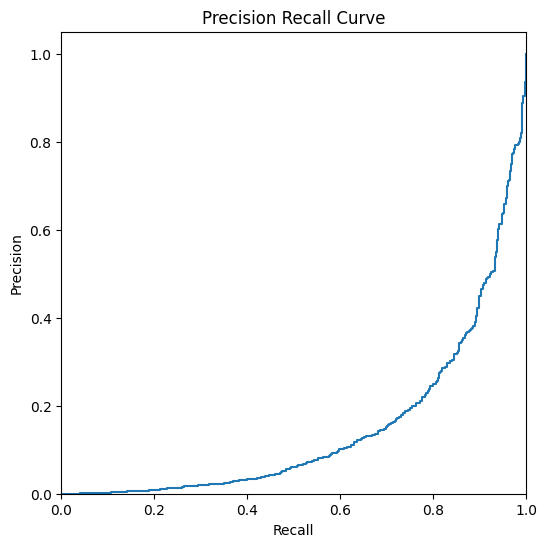

In [46]:
precision, recall, thresholds = roc_curve(target_test, best_prob_test)

plt.figure(figsize = (6,6))
plt.step(recall, precision, where = 'post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.show()

<div class="alert alert-info">

PR Curve 

The curve starts at precision = 1.0 when recall is very low. You can see it generally decreases, but there are some interesting plateaus. The curve shows your model is performing quite well! The high precision at low recall suggests that when the model is very confident about positive predictions, it's usually correct.

At low recall (left side of curve): Your model only identifies the cases it's most confident about as positive. These are usually the "easy" cases, so precision is very high.

As recall increases (moving right): The model has to lower its threshold to catch more positive cases, which means it starts including cases it's less certain about. This inevitably leads to more false positives, reducing precision.
 
High precision, low recall: You'd catch fewer customers who will churn, but you'd be very confident about the ones you do identify

Lower precision, high recall: You'd catch more customers who will churn, but you'd also incorrectly flag more customers who won't churn

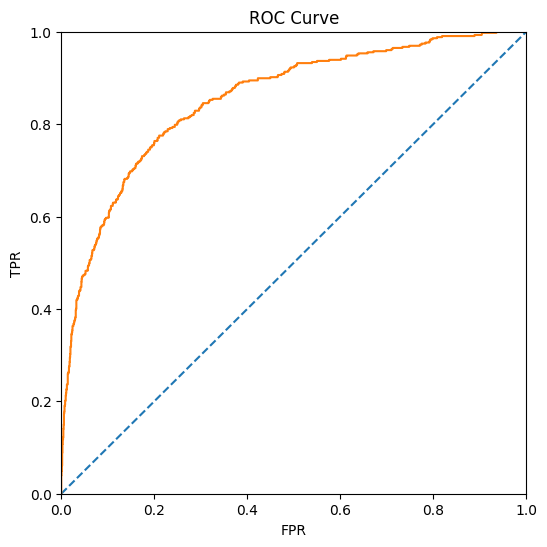

In [47]:
fpr, tpr, thresholds = roc_curve(target_test, best_prob_test)

plt.figure(figsize = (6,6))
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.title('ROC Curve')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work so far with the charts.

</div>

<div class="alert alert-info">

ROC Curve

Great ROC curve! You can see the model is performing quite well - the orange curve is significantly above the diagonal dashed line, which represents random guessing. The closer the curve is to the top-left corner, the better the model. Both curves help evaluate model performance, but they emphasize different aspects. The ROC curve shows that your model can achieve high sensitivity (around 0.8-0.9 TPR) while keeping the false positive rate relatively low (around 0.1-0.2 FPR). This is particularly important for your bank churn prediction problem.

<div class="alert alert-info">

<br><b>CONCLUSION</b>

The Upsampled Random Forest Model is the best model for detecting customer churn rate for Beta Bank.

The metrics show:

<b>Threshold:</b> 0.5<br>
<b>Accuracy:</b> 84.2%<br>
<b>Precision:</b> 64.6%<br>
<b>Recall:</b> 57.8%<br>
<b>F1:</b> 61%<br>
<br>
<b>Confusion Matrix:</b><br>
[1438  135]<br>
[180   247]<br>
<br>
<b>AUC-ROC:</b> 85.3%
<br></br>

While a 0.4 threshold achieved 62.1% F1, the 0.5 threshold provides 64.6% precision vs 57.1%, making it more valuable for business applications despite the slight F1 trade-off. This makes for a smart business perspective! In the context of customer churn prediction for Beta Bank, prioritizing precision makes a lot of sense. Here's why this approach is valuable:

Why precision matters more in this case:

<b>Resource allocation:</b> If the bank acts on my predictions (like offering retention incentives), I want to be confident those customers are actually at risk

<b>Cost efficiency:</b> False positives mean wasting money on customers who weren't going to leave anyway

<b>Targeted interventions:</b> Better to focus retention efforts on customers you're confident about

The results show the strategy of this model is working well.